# **[Data4Life] - Introduction to Data Science**
Topic ***NBA*** - Group ***13***

## **Overview**
## **Title 3: Teams**
**Objective: Analyze Team Weaknesses**
- Identify areas where teams are underperforming:
   - If a team has a low offensive score (ATK), recommend acquiring players strong in scoring metrics (e.g., PTS, FG%, 3P%)
   - If a team has a weak defense, focus on players with high REB, STL, BLK

**Analysis Focus:**
- Identify the Correlation Matrix
- Checking with `pts`, `fg%`, `3p%`, `tov`, `drb`, `stl`, `blk`
- Analyze the trend of points 
- Trends in Key Metrics Over Time

In this file, we will focus on how performance in each teams during 2020-2025. We need to import:
- `team_stats.csv`: the performance stat of team
- `team_stats_per_game.csv`: the average performance stat of team per game
- `team_ratings`: the rating points of team in whole season

### **Import modules**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### **Load datasets**

In [3]:
# Load data
team_stats_avg = pd.read_csv('final_data/team_stats_per_game.csv')
team_stats_total = pd.read_csv('final_data/team_stats.csv')
team_ratings = pd.read_csv('final_data/team_ratings.csv')

### **Understand the data**<div id = "understand"></div>

In `team_stats.csv` and `team_stats_per_game.csv` has 26 columns where:

| **Column Name**  | **Description**                                                                 |
|------------------|---------------------------------------------------------------------------------|
| **rank**         | The ranking of the team or player based on performance metrics (usually within a season or competition). |
| **team**         | The name or abbreviation of the team being analyzed.                          |
| **g**            | Games played – the total number of games played by the team or player.         |
| **mp**           | Minutes played – the total number of minutes played across all games.          |
| **fg**           | Field goals made – the total number of shots made successfully from the field (both two-point and three-point shots). |
| **fga**          | Field goals attempted – the total number of shots attempted from the field.    |
| **fg%**          | Field goal percentage – the percentage of field goals made out of those attempted. |
| **3p**           | Three-point field goals made – the total number of successful three-point shots made. |
| **3pa**          | Three-point field goals attempted – the total number of three-point shots attempted. |
| **3p%**          | Three-point field goal percentage – the percentage of three-point shots made out of those attempted. |
| **2p**           | Two-point field goals made – the total number of successful two-point shots made. |
| **2pa**          | Two-point field goals attempted – the total number of two-point shots attempted. |
| **2p%**          | Two-point field goal percentage – the percentage of two-point shots made out of those attempted. |
| **ft**           | Free throws made – the total number of successful free throws made.            |
| **fta**          | Free throws attempted – the total number of free throws attempted.             |
| **ft%**          | Free throw percentage – the percentage of free throws made out of those attempted. |
| **orb**          | Offensive rebounds – the number of rebounds collected from the offensive side, after a missed field goal or free throw. |
| **drb**          | Defensive rebounds – the number of rebounds collected from the defensive side, after a missed field goal or free throw. |
| **trb**          | Total rebounds – the total number of rebounds (offensive + defensive).         |
| **ast**          | Assists – the total number of passes that directly lead to a basket.           |
| **stl**          | Steals – the total number of times the team or player took the ball away from an opponent. |
| **blk**          | Blocks – the total number of times a shot was blocked.                         |
| **tov**          | Turnovers – the total number of times the team or player lost possession of the ball to the opposing team. |
| **pf**           | Personal fouls – the total number of fouls committed.                          |
| **pts**          | Points – the total number of points scored by the team or player.              |
| **season**       | The specific season (e.g., 2022-2023) during which the data was collected.     |


In [4]:
team_stats_total.head()

,rank,team,g,mp,fg,fga,fg%,3p,3pa,3p%,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season
0,1,Orlando Magic,82,19930,3460,6899,0.502,523,1412,0.370,...,1149,2457,3606,2281,672,488,1297,1726,9091,1994-1995
1,2,Phoenix Suns,82,19830,3356,6967,0.482,584,1584,0.369,...,1027,2403,3430,2198,687,312,1167,1839,9073,1994-1995
2,3,Seattle SuperSonics,82,19830,3310,6741,0.491,491,1305,0.376,...,1068,2337,3405,2115,917,392,1295,2067,9055,1994-1995
3,4,San Antonio Spurs,82,19855,3236,6687,0.484,434,1158,0.375,...,1029,2661,3690,1919,656,456,1246,1871,8742,1994-1995
4,5,Utah Jazz,82,19780,3243,6339,0.512,301,801,0.376,...,874,2412,3286,2256,758,392,1289,2045,8726,1994-1995


In [5]:
team_stats_total.dtypes

rank        int64
team       object
g           int64
mp          int64
fg          int64
fga         int64
fg%       float64
3p          int64
3pa         int64
3p%       float64
2p          int64
2pa         int64
2p%       float64
ft          int64
fta         int64
ft%       float64
orb         int64
drb         int64
trb         int64
ast         int64
stl         int64
blk         int64
tov         int64
pf          int64
pts         int64
season     object
dtype: object

In [6]:
team_stats_avg.head()

,rank,team,g,mp,fg,fga,fg%,3p,3pa,3p%,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season
0,1,Orlando Magic,82,243.0,42.2,84.1,0.502,6.4,17.2,0.370,...,14.0,30.0,44.0,27.8,8.2,6.0,15.8,21.0,110.9,1994-1995
1,2,Phoenix Suns,82,241.8,40.9,85.0,0.482,7.1,19.3,0.369,...,12.5,29.3,41.8,26.8,8.4,3.8,14.2,22.4,110.6,1994-1995
2,3,Seattle SuperSonics,82,241.8,40.4,82.2,0.491,6.0,15.9,0.376,...,13.0,28.5,41.5,25.8,11.2,4.8,15.8,25.2,110.4,1994-1995
3,4,San Antonio Spurs,82,242.1,39.5,81.5,0.484,5.3,14.1,0.375,...,12.5,32.5,45.0,23.4,8.0,5.6,15.2,22.8,106.6,1994-1995
4,5,Utah Jazz,82,241.2,39.5,77.3,0.512,3.7,9.8,0.376,...,10.7,29.4,40.1,27.5,9.2,4.8,15.7,24.9,106.4,1994-1995


In [7]:
team_stats_avg.dtypes

rank        int64
team       object
g           int64
mp        float64
fg        float64
fga       float64
fg%       float64
3p        float64
3pa       float64
3p%       float64
2p        float64
2pa       float64
2p%       float64
ft        float64
fta       float64
ft%       float64
orb       float64
drb       float64
trb       float64
ast       float64
stl       float64
blk       float64
tov       float64
pf        float64
pts       float64
season     object
dtype: object

In `team_ratings` has 16 columns, where:

| **Column Name**              | **Description**                                                                 |
|------------------------------|---------------------------------------------------------------------------------|
| **rank**                     | The position or ranking of the team in a league or competition.                |
| **team**                     | The name or abbreviation of the team being analyzed.                          |
| **conf**                     | The conference the team belongs to (e.g., Eastern or Western Conference).      |
| **div**                      | The division within the conference (e.g., Pacific, Atlantic, etc.).           |
| **wins**                     | The total number of games won by the team in the season.                       |
| **losses**                   | The total number of games lost by the team in the season.                     |
| **win_loss_percentage**      | The percentage of games won by the team.                                      |
| **margin_of_victory**        | The average difference in points scored by the team compared to its opponents. |
| **offensive_rating**         | A measure of the team's offensive efficiency (points scored per 100 possessions). |
| **defensive_rating**         | A measure of the team's defensive efficiency (points allowed per 100 possessions). |
| **net_rating**               | The difference between offensive and defensive ratings (overall efficiency).   |
| **adjusted_margin_of_victory** | The margin of victory adjusted for factors like opponent strength and game pace. |
| **adjusted_offensive_victory** | The offensive rating adjusted for opponent strength and other factors.        |
| **adjusted_defensive_rating** | The defensive rating adjusted for opponent strength and other factors.        |
| **adjusted_net_rating**      | The net rating adjusted for opponent strength and other factors.               |
| **season**                   | The specific season (e.g., 2022-2023) during which the data was collected.    |


In [8]:
team_ratings.head()

,rank,team,conf,div,wins,losses,win_loss_percentage,margin_of_victory,offensive_rating,defensive_rating,net_rating,adjusted_margin_of_victory,adjusted_offensive_victory,adjusted_defensive_rating,adjusted_net_rating,season
0,1,Utah Jazz,W,M,60,22,0.732,7.99,115.18,106.48,8.70,7.75,115.00,106.58,8.43,1994-1995
1,2,Seattle SuperSonics,W,P,57,25,0.695,8.18,115.51,107.06,8.45,7.91,115.34,107.19,8.16,1994-1995
2,3,Orlando Magic,E,A,57,25,0.695,7.06,115.89,108.48,7.41,6.44,115.90,109.13,6.77,1994-1995
3,4,San Antonio Spurs,W,M,62,20,0.756,5.96,112.31,106.04,6.27,5.90,112.13,105.93,6.19,1994-1995
4,5,Chicago Bulls,E,C,47,35,0.573,4.83,110.15,105.13,5.02,4.31,110.00,105.51,4.49,1994-1995


In [9]:
team_ratings.dtypes

rank                            int64
team                           object
conf                           object
div                            object
wins                            int64
losses                          int64
win_loss_percentage           float64
margin_of_victory             float64
offensive_rating              float64
defensive_rating              float64
net_rating                    float64
adjusted_margin_of_victory    float64
adjusted_offensive_victory    float64
adjusted_defensive_rating     float64
adjusted_net_rating           float64
season                         object
dtype: object

### **Data Filtering** <div id = 'filter'> </div>
Because we only attemp to analyze from 2020-2025, so we only keep season from 2020-2025

In [10]:
season_need = ['2019-2020', '2020-2021', '2021-2022', '2022-2023', '2023-2024']

In [11]:
team_stats_total = team_stats_total[team_stats_total['season'].isin(season_need)]
team_stats_avg = team_stats_avg[team_stats_avg['season'].isin(season_need)]
team_ratings = team_ratings[team_ratings['season'].isin(season_need)]

team_stats_total.reset_index(drop=True, inplace=True)
team_stats_avg.reset_index(drop=True, inplace=True)
team_ratings.reset_index(drop=True, inplace=True)

### **Analyze features** 

**Question 1: Identify the Correlation Matrix**

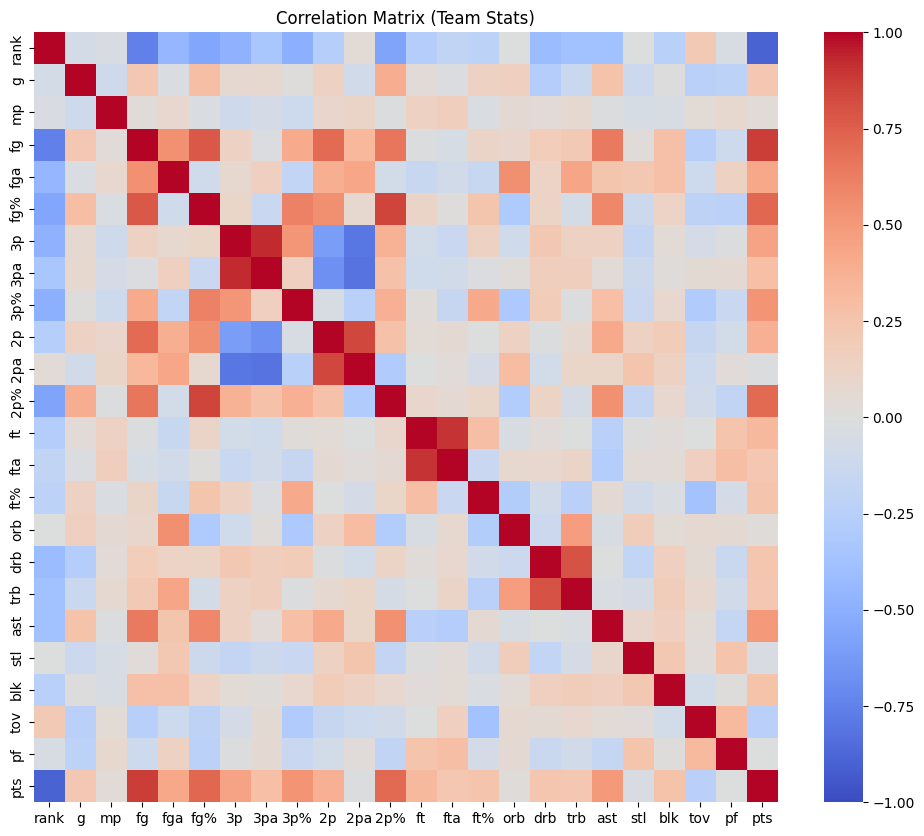

In [14]:
# Correlation Matrix to identify key attributes for predicting performance
plt.figure(figsize=(12, 10))
sns.heatmap(team_stats_avg.select_dtypes(include=['number']).corr(), cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix (Team Stats)")
plt.show()

Attributes important for predicting performance:
- `fg%` (Field Goal Percentage), `3p%` (Three-Point Percentage), and `tov` (Turnovers) show strong correlations with `pts` (Points per game).
- Positive correlation: Better shooting percentages (FG%, 3P%) directly increase points.
- Negative correlation: Higher turnovers (TOV) reduce points.

**Question 2: Checking with `pts`, `fg%`, `3p%`, `tov`, `drb`, `stl`, `blk`**

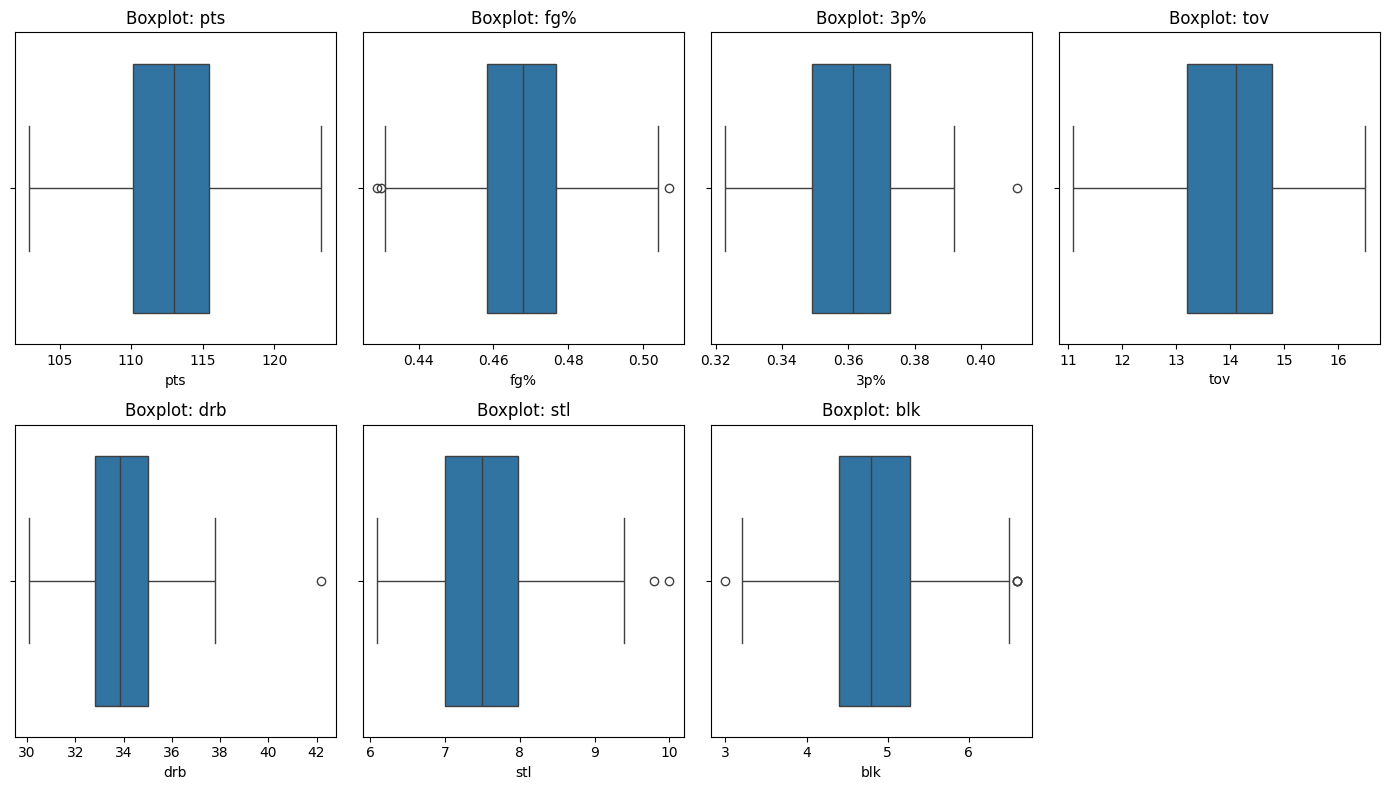

In [15]:
# Checking for outliers in key metrics using boxplots
key_metrics = ['pts', 'fg%', '3p%', 'tov', 'drb', 'stl', 'blk']
plt.figure(figsize=(14, 8))
for i, metric in enumerate(key_metrics):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=team_stats_avg[metric])
    plt.title(f"Boxplot: {metric}")
plt.tight_layout()
plt.show()

Outliers:
- Metrics like `3p%`, `fg%`, and `stl` have noticeable outliers in the boxplots. These could represent exceptionally strong or weak teams and may need to be capped or examined further.

**Question 3: Analyze the trend of points**

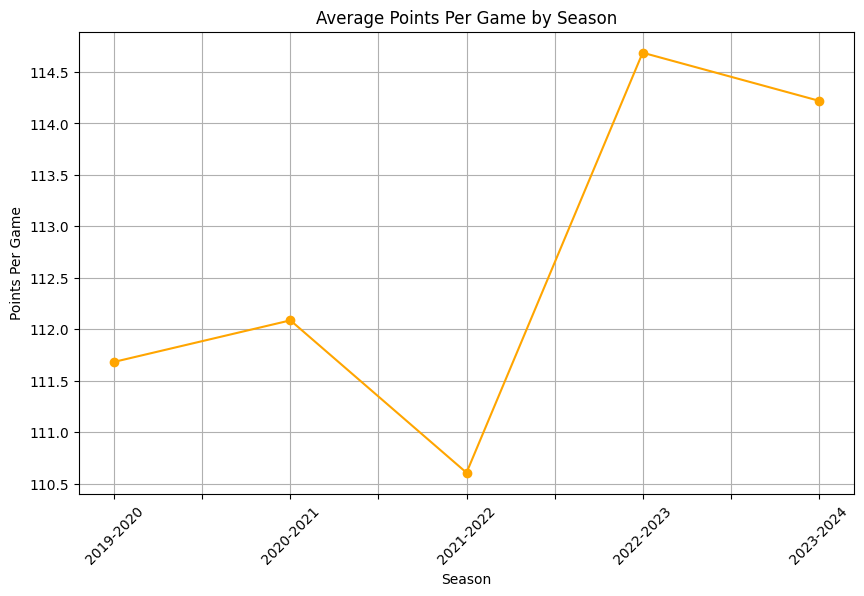

In [20]:
# Average Points Per Game by Season
team_stats_avg['season'] = pd.Categorical(team_stats_avg['season'])
avg_points_season = team_stats_avg.groupby('season', observed=True)['pts'].mean()
avg_points_season.plot(kind='line', figsize=(10, 6), marker='o', color='orange')
plt.title("Average Points Per Game by Season")
plt.ylabel("Points Per Game")
plt.xlabel("Season")
plt.xticks(rotation=45)
plt.grid()
plt.show()


**Question 4: Trends in Key Metrics Over Time**

Trends for `fg%` and `3p%` across seasons

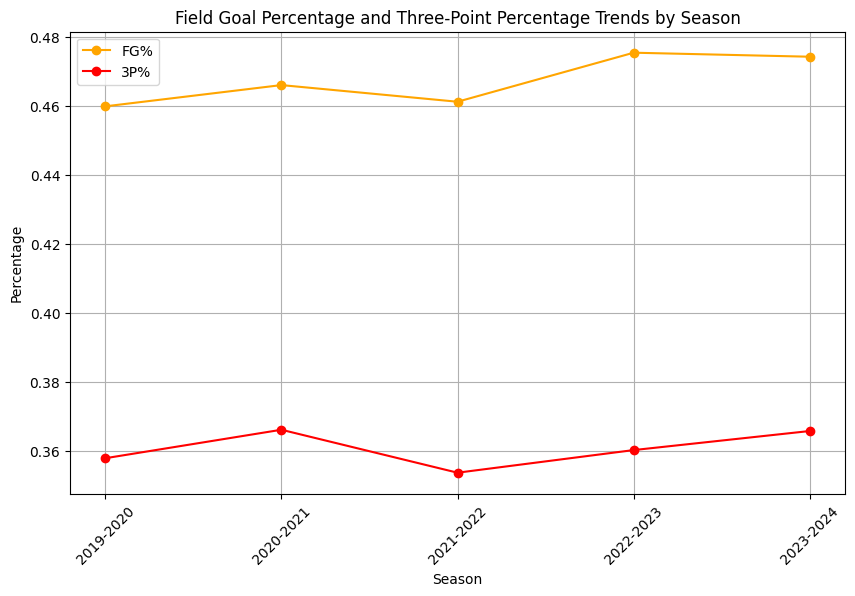

In [19]:
# Trends for 'fg%' and '3p%' across seasons
fg_trend = team_stats_avg.groupby('season', observed=True)['fg%'].mean()
three_point_trend = team_stats_avg.groupby('season', observed=True)['3p%'].mean()

plt.figure(figsize=(10, 6))
plt.plot(fg_trend, label="FG%", marker='o', color='orange')
plt.plot(three_point_trend, label="3P%", marker='o', color='red')
plt.title("Field Goal Percentage and Three-Point Percentage Trends by Season")
plt.ylabel("Percentage")
plt.xlabel("Season")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

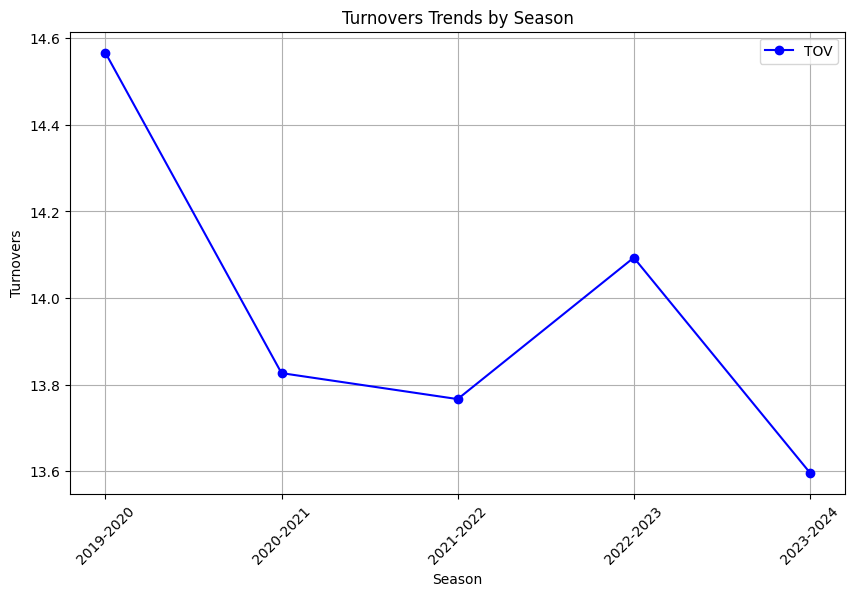

In [27]:
tov_trend = team_stats_avg.groupby('season', observed=True)['tov'].mean()

plt.figure(figsize=(10, 6))
plt.plot(tov_trend, label="TOV", marker='o', color='blue')
plt.title("Turnovers Trends by Season")
plt.ylabel("Turnovers")
plt.xlabel("Season")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

Seasonal Attacking Trends:
- `pts` (Average points per game): have increased significantly over time, indicating a more offensive era in recent seasons.
- `fg%` (Field Goal Percentage): Has remained relatively stable over seasons, with slight improvements.
- `3p%` (Three-Point Percentage): Shows a clear upward trend, reflecting the increasing emphasis on three-point shooting in modern basketball.
- `tov` (Turnovers): Initially high, showing a significant decrease in the next two seasons. However, turnovers increased in 2022-2023 before dropping again, indicating improved ball security in recent seasons.


Trends for `drb`, `blk` and `stl` across seasons

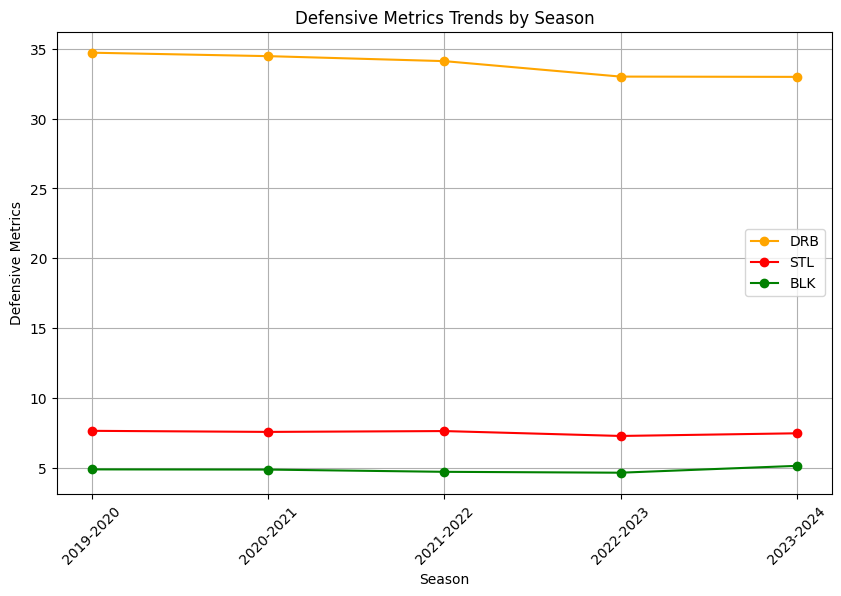

In [26]:
drb_trend = team_stats_avg.groupby('season', observed=True)['drb'].mean()
stl_trend = team_stats_avg.groupby('season', observed=True)['stl'].mean()
blk_trend = team_stats_avg.groupby('season', observed=True)['blk'].mean()

plt.figure(figsize=(10, 6))
plt.plot(drb_trend, label="DRB", marker='o', color='orange')
plt.plot(stl_trend, label="STL", marker='o', color='red')
plt.plot(blk_trend, label="BLK", marker='o', color='green')
plt.title("Defensive Metrics Trends by Season")
plt.ylabel("Defensive Metrics")
plt.xlabel("Season")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

Seasonal Trends:

- `drb` (Defensive Rebounds): Consistently high, with a slight dip but stable overall.
- `stl` (Steals): Steady and consistent across seasons.
- `blk` (Blocks): Low but stable, indicating less focus on shot-blocking.

Overall, these trends suggest a balanced focus on both offense and defense, with steady improvements in certain areas like 3-point shooting, while maintaining core defensive strengths like rebounding. All teams are more likely to focus on attacking.